# goWholesale analysis from Septemeber 2, 2022

#### Stakeholder: Kelly Pigeon

##### We have an opportunity to sell goods from Alibaba on goWholesale. They have a catalog of >100MM items - essentially they sell everything. They've asked us for our ideal assortment from them (since they sell everything). I'd like to figure out what products have the best velocity on goWholesale. If one unit of item x is listed on Day 1, how many days/hours does it take to sell that unit? What commodity sells the fastest? I'd love to see a list of all commodities (UPC, title), and the average velocity in descending order so that we can choose the top 10, top 20, etc.

<!-- Creating ideal seller catalog based on best moving product. ALL Brand New, NO Refurbished
Looking at our historical goWholesale data, what is top 200 best selling products?
B2B Velocity ( Quantity / Days )
Sale Rate
Check-In Rate
Production Rate
Recoveries
B2B Cross-Seller Comparison
B2B Cross-Marketplace Comparison
Do it all again but filter for B2C -->
 

### Cleaning and New Fields

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/tmp/ipykernel_1213/3338272293.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
csv_file_path = "GWS Alibaba Ad Hoc.csv"

df = pd.read_csv(csv_file_path)

In [3]:
df.keys()

Index(['UPC', 'BundleTitle', 'Brand', 'APPLE?', 'Days From Listed to Sold',
       'Current Sold Quantity', 'Current GAAP Sales',
       'Current Shipped Quantity', 'Current Shipped GAAP Sales',
       'Current Sold Recovery % (Lowest Retail)',
       'Current Sold Recovery % (Anchor MSRP)'],
      dtype='object')

In [4]:
df = df.drop(columns=['APPLE?'])

In [5]:
df.head()

,UPC,BundleTitle,Brand,Days From Listed to Sold,Current Sold Quantity,Current GAAP Sales,Current Shipped Quantity,Current Shipped GAAP Sales,Current Sold Recovery % (Lowest Retail),Current Sold Recovery % (Anchor MSRP)
0,93155170421,Bethesda Softworks Fallout 4 (Xbox One) - Vide...,NaN,141.0,20,$60.00,20,$60.00,5%,5%
1,93155170421,Bethesda Softworks Fallout 4 (Xbox One) - Vide...,NaN,134.0,20,$60.00,20,$60.00,5%,5%
2,93155170421,Bethesda Softworks Fallout 4 (Xbox One) - Vide...,NaN,114.0,20,$60.00,20,$60.00,5%,5%
3,93155170421,Bethesda Softworks Fallout 4 (Xbox One) - Vide...,NaN,108.0,20,$60.00,20,$60.00,5%,5%
4,93155170421,Bethesda Softworks Fallout 4 (Xbox One) - Vide...,NaN,107.0,20,$60.00,20,$60.00,5%,5%


In [6]:
df['Brand'] = df['BundleTitle'].str.split().str[0]

In [7]:
df['Brand'].unique()

array(['Bethesda', 'Gateway', 'HP', 'Samsung', 'SAMSUNG', 'SEGA',
       'Energy', 'LG', 'Epson', 'Bitty', 'Apple', 'Hart', 'Hyper',
       'Jetson', 'Altec', 'Nordic', 'Canon', 'Little', 'WYZE', 'eKids',
       'Onn', 'Bose', 'Beats', 'VIZIO', 'Nest', 'Plantronics', 'AtGames',
       "D'Addario", 'PDP', 'Schumacher', 'Sony', 'iHome', 'Jasco',
       'Ecoscapes', 'Homedics', 'Fugoo', '3Plus', 'MGA', 'Vivitar',
       'ProForm', 'Milwaukee', 'Play', 'Google', 'SideTrak', 'Bare-Tool',
       'OnePlus', 'Circuit', 'Builders', 'Chillafish', 'Yvolution',
       'BITTY', 'Polaroid', 'Monster', 'ION', 'Singing', 'MILWAUKEE',
       'Anker', 'JBL', 'DS18474', 'Zuru', 'SKIL', 'CYBEX', 'NETGEAR',
       'Tcl', 'SunnyLife', 'SanDisk', 'NINTENDO', 'Nintendo', 'WOW',
       'Disney', 'TCL', 'Hisense', 'Motorola', 'JVC', 'SAGT14723-4',
       'Gillette', 'LENOVO', 'Atari', 'Globe', 'stila', 'Philips', 'Onn.',
       'onn.', 'Garmin', 'Vizio', 'onn', 'FC630-68080XL', '8', "35'",
       'Unbranded', '

In [8]:
df['Brand'] = df['Brand'].str.lower()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311921 entries, 0 to 311920
Data columns (total 10 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   UPC                                      311921 non-null  int64  
 1   BundleTitle                              311921 non-null  object 
 2   Brand                                    311921 non-null  object 
 3   Days From Listed to Sold                 305082 non-null  float64
 4   Current Sold Quantity                    311921 non-null  object 
 5   Current GAAP Sales                       311921 non-null  object 
 6   Current Shipped Quantity                 300965 non-null  object 
 7   Current Shipped GAAP Sales               300965 non-null  object 
 8   Current Sold Recovery % (Lowest Retail)  311921 non-null  object 
 9   Current Sold Recovery % (Anchor MSRP)    311921 non-null  object 
dtypes: float64(1), int64(1), object(

In [10]:
df['Current GAAP Sales'] = pd.to_numeric(df['Current GAAP Sales'].replace('[\$,]', '', regex=True), errors='coerce')

brand_sales = df.groupby('Brand')['Current GAAP Sales'].sum()

# Sorted brands by total sales
top_brands = brand_sales.sort_values(ascending=False)

In [11]:
print(top_brands[:10].keys().to_list())
#So these are our top brands by Total Sales

['apple', 'hp', 'beats', 'nintendo', 'samsung', 'gateway', 'asus', 'onn', 'milwaukee', 'microsoft']


In [12]:
df.head(3)

,UPC,BundleTitle,Brand,Days From Listed to Sold,Current Sold Quantity,Current GAAP Sales,Current Shipped Quantity,Current Shipped GAAP Sales,Current Sold Recovery % (Lowest Retail),Current Sold Recovery % (Anchor MSRP)
0,93155170421,Bethesda Softworks Fallout 4 (Xbox One) - Vide...,bethesda,141.0,20,60.0,20,$60.00,5%,5%
1,93155170421,Bethesda Softworks Fallout 4 (Xbox One) - Vide...,bethesda,134.0,20,60.0,20,$60.00,5%,5%
2,93155170421,Bethesda Softworks Fallout 4 (Xbox One) - Vide...,bethesda,114.0,20,60.0,20,$60.00,5%,5%


In [13]:
df['Current Sold Quantity'] = pd.to_numeric(df['Current Sold Quantity'], errors='coerce')
df['Days From Listed to Sold'] = pd.to_numeric(df['Days From Listed to Sold'], errors='coerce')

In [14]:
#I am getting 2231 'Days From Listed to Sold' below 0, I discussed earlier with aiden although the new CSV given dropped a lot of important UPCs  

df_sorted = df.sort_values('Days From Listed to Sold')
df = df_sorted[df_sorted['Days From Listed to Sold'] >= 0]

In [15]:
#We need to +1 to all days in "Days From Listed to Sold" to calculate Velocity
#Only run this cell once!

df['Days From Listed to Sold'] += 1

/tmp/ipykernel_1213/1223822555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Days From Listed to Sold'] += 1


In [16]:
df['Velocity'] = df['Current Sold Quantity'] / df['Days From Listed to Sold']

/tmp/ipykernel_1213/2376953170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Velocity'] = df['Current Sold Quantity'] / df['Days From Listed to Sold']


In [17]:
df.dropna(subset=['Velocity'], inplace=True)

/tmp/ipykernel_1213/178649493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Velocity'], inplace=True)


In [18]:
same_day_sales = (df['Days From Listed to Sold'] == 1).sum()
total_units_same_day_sales = df.loc[df['Days From Listed to Sold'] == 1, 'Current Sold Quantity'].sum()
print("Number of UPCs sold in the same day:", same_day_sales)
print("Total units sold in the same day:", total_units_same_day_sales)

Number of UPCs sold in the same day: 6486
Total units sold in the same day: 521501.0


In [19]:
average_days_to_sold = round(df['Days From Listed to Sold'].mean())
average_velocity = round(np.mean(df['Velocity'].to_numpy()))

print(f"Average velocity for each UPC listing: {average_velocity}")
print(f"Average amount of days sold for each listing: {average_days_to_sold} days")

# average_recovery_lowest_retail = df['Current Sold Recovery % (Lowest Retail)'].mean()
# average_recovery_anchor_msrp = df['Current Sold Recovery % (Anchor MSRP)'].mean()
# print("Average Recovery % (Lowest Retail):", average_recovery_lowest_retail)
# print("Average Recovery % (Anchor MSRP):", average_recovery_anchor_msrp)

Average velocity for each UPC listing: 8
Average amount of days sold for each listing: 34 days


### The top 15 fastest UPC's with either respect to total sales or only the average velocity

In [20]:
grouped_df = df.groupby('UPC').agg({
    'BundleTitle': 'first',  
    'Velocity': 'mean',  
    'Current GAAP Sales': 'sum',
    'Current Sold Quantity': 'sum'
}).reset_index()

# Rename the columns for clarity
grouped_df = grouped_df.rename(columns={'Velocity': 'Average Velocity', 'Current GAAP Sales': 'Total Sales', 'Current Sold Quantity': 'Total Quantity'})

In [21]:
#Here are the top 200 selling brands in respect to total sales 
top_200_sales_df = grouped_df.sort_values(by='Total Sales', ascending=False)[:200]

#### With top 200 sales

In [22]:
top_sales_grouped_df = top_200_sales_df.sort_values(by='Total Sales', ascending=False)[:15]
top_sales_velocity_df = top_sales_grouped_df.sort_values(by='Average Velocity', ascending=False)

print("Fastest moving product in terms of Total Sales:\n")

top_sales_velocity_df

Fastest moving product in terms of Total Sales:



,UPC,BundleTitle,Average Velocity,Total Sales,Total Quantity
1578,194253324034,Apple AirPods 3 White In Ear Headphones MPNY3AM/A,31.185051,296819948.0,3138228.0
1602,194253397168,Apple AirPods Pro 2 White In Ear Headphones MQ...,30.296127,293068972.0,2143064.0
1381,194252586167,Apple Watch SE 44mm Space Gray Aluminum - Midn...,23.414811,61174800.0,474000.0
2098,197192614297,"HP 15-FD0083WM 15.6"" HD Pentium N200 1.8GHz In...",18.131110,39851460.0,228250.0
973,190199312722,Beats by Dr. Dre Studio3 Wireless Noise Cancel...,14.004268,53123083.0,469696.0
994,190199462748,Beats by Dr. Dre MXJ92LL/A Studio3 Wireless No...,12.195942,39420735.0,343441.0
2003,196068246754,"HP 14a-ca0130wm 14"" HD Touchscreen Celeron N40...",11.693225,34200328.0,250920.0
3122,812550034967,"Gateway GWTC51427-BK 14.1"" FHD Touchscreen i5-...",10.213362,38293360.0,181279.0
621,45496883775,Nintendo HADSKABAH Switch with Neon Blue and N...,9.014823,53604720.0,259584.0
1511,194253215035,Apple Watch Gen 8 Series 8 45mm Midnight Alumi...,7.785298,53139821.0,216545.0


In [23]:
top_velocity_df = top_200_sales_df.sort_values(by='Average Velocity', ascending=False)[:15]

print("Fastest moving product in terms of Velocity:\n")

top_velocity_df

Fastest moving product in terms of Velocity:



,UPC,BundleTitle,Average Velocity,Total Sales,Total Quantity
3759,887276371399,"SAMSUNG XE310XBA-K01US Chromebook 4 11.6"", Int...",89.398718,683137.0,9373.0
2023,196337630390,"HP 14-cf2112wm Stream 14"" HD Celeron N4020 1.1...",88.653589,6247380.0,47610.0
2022,196337630383,"HP 14-cf2111wm Stream 14"" HD Celeron N4120 1.1...",46.931157,27172134.0,220150.0
3103,812550034080,"Gateway GWTC116-2BL 11.6"" HD Touchscreen Lapto...",42.786643,11310600.0,129024.0
3885,887276769127,"SAMSUNG XE310XBA-KC2US 11.6"" HD Celeron N4020 ...",42.214610,19715986.0,243190.0
1578,194253324034,Apple AirPods 3 White In Ear Headphones MPNY3AM/A,31.185051,296819948.0,3138228.0
1602,194253397168,Apple AirPods Pro 2 White In Ear Headphones MQ...,30.296127,293068972.0,2143064.0
972,190199312487,Beats by Dr. Dre Solo3 Wireless Rose Gold On E...,26.701761,3861840.0,47460.0
1381,194252586167,Apple Watch SE 44mm Space Gray Aluminum - Midn...,23.414811,61174800.0,474000.0
1333,194252515655,Apple iPad 9th Gen 64GB Space Gray Wi-Fi MK2K3...,23.357230,15999640.0,85807.0


In [24]:
top_velocity_df = top_200_sales_df.sort_values(by='Total Quantity', ascending=False)[:15].sort_values(by='Average Velocity', ascending=False)

print("Fastest moving product in terms of Quantity:\n")

top_velocity_df

Fastest moving product in terms of Quantity:



,UPC,BundleTitle,Average Velocity,Total Sales,Total Quantity
1578,194253324034,Apple AirPods 3 White In Ear Headphones MPNY3AM/A,31.185051,296819948.0,3138228.0
1602,194253397168,Apple AirPods Pro 2 White In Ear Headphones MQ...,30.296127,293068972.0,2143064.0
1381,194252586167,Apple Watch SE 44mm Space Gray Aluminum - Midn...,23.414811,61174800.0,474000.0
1319,194252388297,Beats by Dr. Dre Studio Buds Black Totally Wir...,19.915809,17247616.0,312832.0
971,190199312425,Beats by Dr. Dre Solo3 Wireless Matte Black Be...,17.368380,20690176.0,264448.0
973,190199312722,Beats by Dr. Dre Studio3 Wireless Noise Cancel...,14.004268,53123083.0,469696.0
3120,812550034882,"Gateway GCNP41524-BK 15.6"" HD Pentium Silver N...",13.056041,23484538.0,264698.0
994,190199462748,Beats by Dr. Dre MXJ92LL/A Studio3 Wireless No...,12.195942,39420735.0,343441.0
1040,190199801561,Beats by Dr. Dre Flex All-Day Wireless In-Ear ...,11.779652,5137120.0,253280.0
1014,190199701984,Beats by Dr. Dre Powerbeats Pro Black In Ear H...,10.877250,25900197.0,311288.0


#### With everthing from September 2, 2022

In [25]:
top_sales_grouped_df = grouped_df.sort_values(by='Total Sales', ascending=False)[:15]
top_sales_velocity_df = top_sales_grouped_df.sort_values(by='Average Velocity', ascending=False)

print("Fastest moving product in terms of Total Sales:\n")

top_sales_velocity_df

Fastest moving product in terms of Total Sales:



,UPC,BundleTitle,Average Velocity,Total Sales,Total Quantity
1578,194253324034,Apple AirPods 3 White In Ear Headphones MPNY3AM/A,31.185051,296819948.0,3138228.0
1602,194253397168,Apple AirPods Pro 2 White In Ear Headphones MQ...,30.296127,293068972.0,2143064.0
1381,194252586167,Apple Watch SE 44mm Space Gray Aluminum - Midn...,23.414811,61174800.0,474000.0
2098,197192614297,"HP 15-FD0083WM 15.6"" HD Pentium N200 1.8GHz In...",18.131110,39851460.0,228250.0
973,190199312722,Beats by Dr. Dre Studio3 Wireless Noise Cancel...,14.004268,53123083.0,469696.0
994,190199462748,Beats by Dr. Dre MXJ92LL/A Studio3 Wireless No...,12.195942,39420735.0,343441.0
2003,196068246754,"HP 14a-ca0130wm 14"" HD Touchscreen Celeron N40...",11.693225,34200328.0,250920.0
3122,812550034967,"Gateway GWTC51427-BK 14.1"" FHD Touchscreen i5-...",10.213362,38293360.0,181279.0
621,45496883775,Nintendo HADSKABAH Switch with Neon Blue and N...,9.014823,53604720.0,259584.0
1511,194253215035,Apple Watch Gen 8 Series 8 45mm Midnight Alumi...,7.785298,53139821.0,216545.0


In [26]:
top_velocity_df = grouped_df.sort_values(by='Average Velocity', ascending=False)[:15]

print("Fastest moving product in terms of Velocity:\n")

top_velocity_df

Fastest moving product in terms of Velocity:



,UPC,BundleTitle,Average Velocity,Total Sales,Total Quantity
3759,887276371399,"SAMSUNG XE310XBA-K01US Chromebook 4 11.6"", Int...",89.398718,683137.0,9373.0
2023,196337630390,"HP 14-cf2112wm Stream 14"" HD Celeron N4020 1.1...",88.653589,6247380.0,47610.0
3502,850009337009,Level C-B11U Lock Bolt Edition Smart Deadbolt ...,70.000000,12600.0,210.0
2403,673419350570,LEGO 6360174 Jurassic World Baryonyx Dinosaur ...,62.250000,6972.0,166.0
2022,196337630383,"HP 14-cf2111wm Stream 14"" HD Celeron N4120 1.1...",46.931157,27172134.0,220150.0
212,39800130723,Energizer Ultimate Lithium AA 18-Pack - Longes...,44.285714,4960.0,310.0
3103,812550034080,"Gateway GWTC116-2BL 11.6"" HD Touchscreen Lapto...",42.786643,11310600.0,129024.0
3885,887276769127,"SAMSUNG XE310XBA-KC2US 11.6"" HD Celeron N4020 ...",42.214610,19715986.0,243190.0
2582,681131279987,ONN 100006053 64GB Class 10 U3 microSDXC Flash...,35.000000,490.0,70.0
1578,194253324034,Apple AirPods 3 White In Ear Headphones MPNY3AM/A,31.185051,296819948.0,3138228.0


In [27]:
top_velocity_df = grouped_df.sort_values(by='Total Quantity', ascending=False)[:15].sort_values(by='Average Velocity', ascending=False)

print("Fastest moving product in terms of Quantity:\n")

top_velocity_df

Fastest moving product in terms of Quantity:



,UPC,BundleTitle,Average Velocity,Total Sales,Total Quantity
1578,194253324034,Apple AirPods 3 White In Ear Headphones MPNY3AM/A,31.185051,296819948.0,3138228.0
1602,194253397168,Apple AirPods Pro 2 White In Ear Headphones MQ...,30.296127,293068972.0,2143064.0
1381,194252586167,Apple Watch SE 44mm Space Gray Aluminum - Midn...,23.414811,61174800.0,474000.0
1319,194252388297,Beats by Dr. Dre Studio Buds Black Totally Wir...,19.915809,17247616.0,312832.0
971,190199312425,Beats by Dr. Dre Solo3 Wireless Matte Black Be...,17.368380,20690176.0,264448.0
973,190199312722,Beats by Dr. Dre Studio3 Wireless Noise Cancel...,14.004268,53123083.0,469696.0
3120,812550034882,"Gateway GCNP41524-BK 15.6"" HD Pentium Silver N...",13.056041,23484538.0,264698.0
994,190199462748,Beats by Dr. Dre MXJ92LL/A Studio3 Wireless No...,12.195942,39420735.0,343441.0
1040,190199801561,Beats by Dr. Dre Flex All-Day Wireless In-Ear ...,11.779652,5137120.0,253280.0
1014,190199701984,Beats by Dr. Dre Powerbeats Pro Black In Ear H...,10.877250,25900197.0,311288.0


#### Let's take a look without Apple

In [28]:
apple_df = df[df['Brand'] == 'apple'].copy()
filtered_df = df[df['Brand'] != 'apple'].copy()

In [29]:
print("Apple Dataframe Shape: ",apple_df.shape)
print("Filtered Out Apple Shape: ",filtered_df.shape)
print("Original Dataframe Shape: ",df.shape)

Apple Dataframe Shape:  (141558, 11)
Filtered Out Apple Shape:  (158238, 11)
Original Dataframe Shape:  (299796, 11)


In [30]:
grouped_filtered_df = filtered_df.groupby('UPC').agg({
    'BundleTitle': 'first',  
    'Velocity': 'mean',  
    'Current GAAP Sales': 'sum',
    'Current Sold Quantity': 'sum'
}).reset_index()

# Rename the columns for clarity
grouped_filtered_df = grouped_filtered_df.rename(columns={'Velocity': 'Average Velocity', 'Current GAAP Sales': 'Total Sales', 'Current Sold Quantity': 'Total Quantity'})

In [31]:
top_sales_grouped = grouped_filtered_df.sort_values(by='Total Sales', ascending=False)[:15]
top_sales_velocity = top_sales_grouped.sort_values(by='Average Velocity', ascending=False)

print("Fastest moving product in terms of Total Sales without Apple:\n")

top_sales_velocity

Fastest moving product in terms of Total Sales without Apple:



,UPC,BundleTitle,Average Velocity,Total Sales,Total Quantity
1267,196337630383,"HP 14-cf2111wm Stream 14"" HD Celeron N4120 1.1...",46.931157,27172134.0,220150.0
1343,197192614297,"HP 15-FD0083WM 15.6"" HD Pentium N200 1.8GHz In...",18.131110,39851460.0,228250.0
863,190199312425,Beats by Dr. Dre Solo3 Wireless Matte Black Be...,17.368380,20690176.0,264448.0
865,190199312722,Beats by Dr. Dre Studio3 Wireless Noise Cancel...,14.004268,53123083.0,469696.0
2357,812550034882,"Gateway GCNP41524-BK 15.6"" HD Pentium Silver N...",13.056041,23484538.0,264698.0
867,190199462748,Beats by Dr. Dre MXJ92LL/A Studio3 Wireless No...,12.195942,39420735.0,343441.0
1248,196068246754,"HP 14a-ca0130wm 14"" HD Touchscreen Celeron N40...",11.693225,34200328.0,250920.0
610,45496882266,Nintendo HDHSBAZAA Switch Lite Turquoise,11.645853,27637926.0,206832.0
868,190199701984,Beats by Dr. Dre Powerbeats Pro Black In Ear H...,10.877250,25900197.0,311288.0
1197,195697617102,"HP 15-dy2131wm 15.6"" FHD Laptop i3-1115G4 3GHz...",10.762989,21740928.0,98496.0


In [32]:
top_velocity = grouped_filtered_df.sort_values(by='Average Velocity', ascending=False)[:15]

print("Fastest moving product without Apple:\n")

top_velocity

Fastest moving product without Apple:



,UPC,BundleTitle,Average Velocity,Total Sales,Total Quantity
2982,887276371399,"SAMSUNG XE310XBA-K01US Chromebook 4 11.6"", Int...",89.398718,683137.0,9373.0
1268,196337630390,"HP 14-cf2112wm Stream 14"" HD Celeron N4020 1.1...",88.653589,6247380.0,47610.0
2738,850009337009,Level C-B11U Lock Bolt Edition Smart Deadbolt ...,70.000000,12600.0,210.0
1647,673419350570,LEGO 6360174 Jurassic World Baryonyx Dinosaur ...,62.250000,6972.0,166.0
1267,196337630383,"HP 14-cf2111wm Stream 14"" HD Celeron N4120 1.1...",46.931157,27172134.0,220150.0
212,39800130723,Energizer Ultimate Lithium AA 18-Pack - Longes...,44.285714,4960.0,310.0
2340,812550034080,"Gateway GWTC116-2BL 11.6"" HD Touchscreen Lapto...",42.786643,11310600.0,129024.0
3108,887276769127,"SAMSUNG XE310XBA-KC2US 11.6"" HD Celeron N4020 ...",42.214610,19715986.0,243190.0
1825,681131279987,ONN 100006053 64GB Class 10 U3 microSDXC Flash...,35.000000,490.0,70.0
1744,673419376884,LEGO 6427610 Star Wars Boba Fetts Starship Mic...,30.000000,180.0,30.0


In [33]:
top_velocity_df = grouped_filtered_df.sort_values(by='Total Quantity', ascending=False)[:15].sort_values(by='Average Velocity', ascending=False)

print("Fastest moving product in terms of quantity without Apple:\n")

top_velocity_df

Fastest moving product in terms of quantity without Apple:



,UPC,BundleTitle,Average Velocity,Total Sales,Total Quantity
1267,196337630383,"HP 14-cf2111wm Stream 14"" HD Celeron N4120 1.1...",46.931157,27172134.0,220150.0
3108,887276769127,"SAMSUNG XE310XBA-KC2US 11.6"" HD Celeron N4020 ...",42.214610,19715986.0,243190.0
1016,194252388297,Beats by Dr. Dre Studio Buds Black Totally Wir...,19.915809,17247616.0,312832.0
1343,197192614297,"HP 15-FD0083WM 15.6"" HD Pentium N200 1.8GHz In...",18.131110,39851460.0,228250.0
863,190199312425,Beats by Dr. Dre Solo3 Wireless Matte Black Be...,17.368380,20690176.0,264448.0
865,190199312722,Beats by Dr. Dre Studio3 Wireless Noise Cancel...,14.004268,53123083.0,469696.0
2357,812550034882,"Gateway GCNP41524-BK 15.6"" HD Pentium Silver N...",13.056041,23484538.0,264698.0
867,190199462748,Beats by Dr. Dre MXJ92LL/A Studio3 Wireless No...,12.195942,39420735.0,343441.0
870,190199801561,Beats by Dr. Dre Flex All-Day Wireless In-Ear ...,11.779652,5137120.0,253280.0
1248,196068246754,"HP 14a-ca0130wm 14"" HD Touchscreen Celeron N40...",11.693225,34200328.0,250920.0


### Analysis

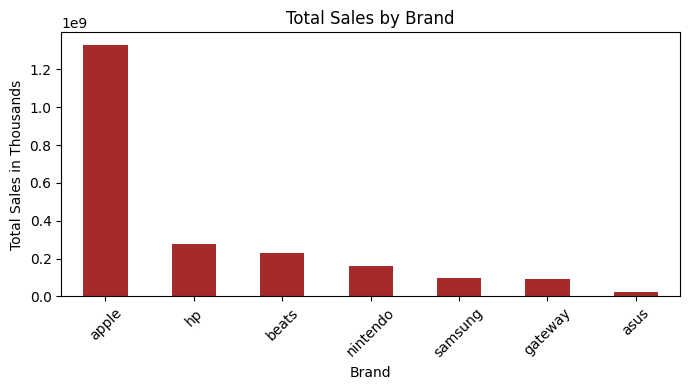

In [34]:
brand_sales = df.groupby('Brand')['Current GAAP Sales'].sum()

# Sort brands by total sales
sorted_brands = brand_sales.sort_values(ascending=False)

plt.figure(figsize=(7, 4))
sorted_brands[:7].plot(kind='bar', color='brown')
plt.title('Total Sales by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Sales in Thousands')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

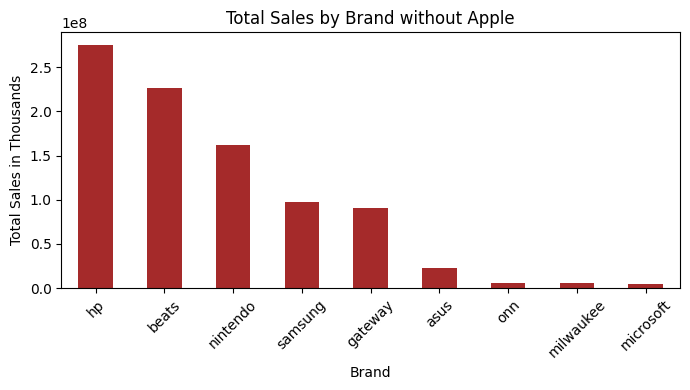

In [35]:
plt.figure(figsize=(7, 4))
sorted_brands[1:10].plot(kind='bar', color='brown')
plt.title('Total Sales by Brand without Apple')
plt.xlabel('Brand')
plt.ylabel('Total Sales in Thousands')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
grouped_apple_df = apple_df.groupby('UPC').agg({
    'BundleTitle': 'first',  
    'Velocity': 'mean',  
    'Current GAAP Sales': 'sum',
    'Current Sold Quantity': 'sum'
}).reset_index()

# Rename the columns for clarity
grouped_apple_df = grouped_apple_df.rename(columns={'Velocity': 'Average Velocity', 'Current GAAP Sales': 'Total Sales', 'Current Sold Quantity': 'Total Quantity'})
grouped_apple_df['apple product'] = grouped_apple_df['BundleTitle'].str.split().str[:2].apply(lambda x: ' '.join(x))

# grouped_apple_df['apple product'].unique()

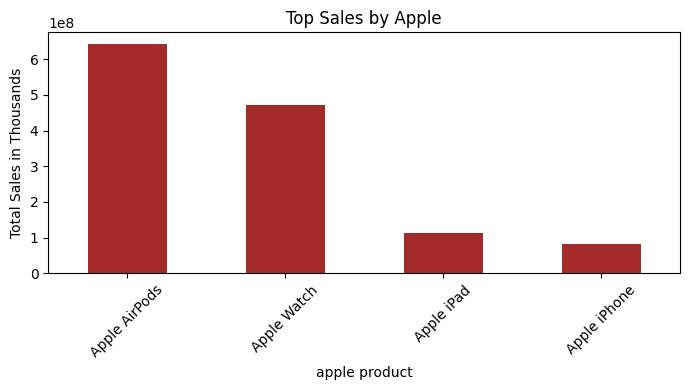

In [37]:
apple_sales = grouped_apple_df.groupby('apple product')['Total Sales'].sum()
sorted_apple = apple_sales.sort_values(ascending=False)

plt.figure(figsize=(7, 4))
sorted_apple[:4].plot(kind='bar', color='brown')
plt.title('Top Sales by Apple')
plt.ylabel('Total Sales in Thousands')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
brand_velocity = df.groupby('Brand')['Velocity'].mean()

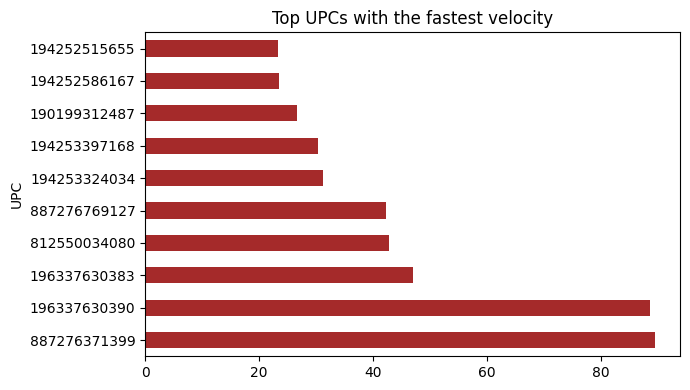

In [39]:
brand_velocity = top_200_sales_df.groupby('UPC')['Average Velocity'].mean()
sorted_upc_velocity = brand_velocity.sort_values(ascending=False)

plt.figure(figsize=(7, 4))
sorted_upc_velocity[:10].plot(kind='barh', color='brown') 
plt.title('Top UPCs with the fastest velocity')
plt.tight_layout()
plt.show()

The Top 10 Fastest Products and best selling on goWholesale

In [40]:
print(df[df['UPC'].isin(sorted_upc_velocity[:10].index)]['BundleTitle'].unique())

['Apple AirPods Pro 2 White In Ear Headphones MQD83AM/A'
 'Apple AirPods 3 White In Ear Headphones MPNY3AM/A'
 'HP 14-cf2112wm Stream 14" HD Celeron N4020 1.1GHz Intel UHD Graphics 600 4GB RAM 64GB SSD Win 11 Home Rose Pink'
 'Apple iPad 9th Gen 64GB Space Gray Wi-Fi MK2K3LL/A (Latest Model)'
 'HP 14-cf2111wm Stream 14" HD Celeron N4120 1.1GHz Intel UHD Graphics 600 4GB RAM 64GB SSD Win 11 Home Blue'
 'SAMSUNG XE310XBA-K01US Chromebook 4 11.6", Intel Celeron Processor N4000, 4GB RAM, 32GB eMMC, Intel UHD Graphics 600 - Silver'
 'SAMSUNG XE310XBA-KC2US 11.6" HD Celeron N4020 1.1GHz Intel UHD Graphics 4GB RAM 64GB SSD Chrome OS Platinum Titan'
 'Apple Watch SE 44mm Space Gray Aluminum - Midnight Blue Sport Band MKQ63LL/A'
 'Gateway GWTC116-2BL 11.6" HD Touchscreen Laptop Celeron N4020 1.1GHz Intel UHD Graphics 600 4GB RAM 64GB SSD Windows 11 Home Blue'
 'Beats by Dr. Dre Solo3 Wireless Rose Gold On Ear Headphones MX442LL/A']


### Merging on the revised CSV

- UPC
- Title
- Category
- order Type (B2B, B2C)
- Total Qty Sold
- Total GAAP Sales
- Total Qty Shipped
- Total Shipped GAAP Sales
- Average number of units sold a day
- Average number of units checked in a day
- Average number of units produced a day
- Average Recovery % (Sale Price/Retail Price)

In [41]:
csv_file_path = "GWS Alibaba Ad Hoc Source File 2.csv"
df2 = pd.read_csv(csv_file_path)

In [42]:
merged_df = pd.merge(df2, grouped_df, on='UPC', how='inner')

In [43]:
merged_df.keys()

Index(['FullCategoryName', 'UPC', 'Condition', 'Order_Type',
       'Average Checked In per Day', 'Average Produced per Day',
       'Average Sold per Day After Listing', 'Average Sold per Day',
       'Sold Quantity', 'GAAP Sales', 'Sold Recovery % (Lowest Retail)',
       'Sold Recovery % (Anchor MSRP)', 'Average Shipped per Day',
       'Shipped Quantity', 'Shipped GAAP Sales', 'BundleTitle',
       'Average Velocity', 'Total Sales', 'Total Quantity'],
      dtype='object')

In [44]:
grouped_df["UPC"].nunique()

4085

In [45]:
df2["UPC"].nunique()

728

In [46]:
merged_df["UPC"].nunique()

415

In [47]:
df2.shape

(1486, 15)

In [48]:
merged_df.drop(['Total Sales', 'Total Quantity'], axis=1, inplace=True)

In [49]:
merged_df.keys()

Index(['FullCategoryName', 'UPC', 'Condition', 'Order_Type',
       'Average Checked In per Day', 'Average Produced per Day',
       'Average Sold per Day After Listing', 'Average Sold per Day',
       'Sold Quantity', 'GAAP Sales', 'Sold Recovery % (Lowest Retail)',
       'Sold Recovery % (Anchor MSRP)', 'Average Shipped per Day',
       'Shipped Quantity', 'Shipped GAAP Sales', 'BundleTitle',
       'Average Velocity'],
      dtype='object')

In [50]:
reorder = [
    'UPC',
    'BundleTitle',
    'FullCategoryName',
    'Condition',
    'Order_Type',
    'Average Checked In per Day',
    'Average Produced per Day',
    'Average Sold per Day After Listing',
    'Average Sold per Day',
    'Sold Quantity',
    'GAAP Sales',
    'Sold Recovery % (Lowest Retail)',
    'Sold Recovery % (Anchor MSRP)',
    'Average Shipped per Day',
    'Shipped Quantity',
    'Shipped GAAP Sales',
    'Average Velocity'
]

merged_df = merged_df[reorder]

In [51]:
merged_df

,UPC,BundleTitle,FullCategoryName,Condition,Order_Type,Average Checked In per Day,Average Produced per Day,Average Sold per Day After Listing,Average Sold per Day,Sold Quantity,GAAP Sales,Sold Recovery % (Lowest Retail),Sold Recovery % (Anchor MSRP),Average Shipped per Day,Shipped Quantity,Shipped GAAP Sales,Average Velocity
0,3.414196e+08,"Clinique CLI15689 Happy Eau de Parfum, Perfume...",Health & Beauty -> Fragrances,New,B2BMarketplace,0.038462,0.038462,0.166667,0.050000,2,$28,24%,24%,0.055556,2.0,$28,0.153846
1,8.421954e+09,Ty Toys T95408 Open on The Ankle Plush Toy,"Clothing, Shoes & Accessories -> Shoes -> Womens",New,B2BMarketplace,0.013841,0.031746,0.016064,0.100000,4,$12,13%,3%,0.108108,4.0,$12,0.016000
2,1.008663e+10,Sega Sonic Colors Ultimate (PS4),Electronics -> Video Games -> Games -> Sony,New,B2BMarketplace,0.142857,0.142857,0.200000,0.500000,1,$6,18%,10%,NaN,NaN,NaN,0.166667
3,1.008663e+10,SEGA Demon Slayer: The Hinokami Chronicles (Pl...,Electronics -> Video Games -> Games -> Sony,New,B2BMarketplace,0.240000,0.250000,0.972973,0.272727,6,$46,22%,13%,0.062500,1.0,$6,0.687500
4,1.008663e+10,Sony Sonic Frontiers (PlayStation 4),Electronics -> Video Games -> Games -> Sony,New,B2BMarketplace,0.057143,0.057143,0.173913,0.086957,2,$18,15%,23%,0.066667,1.0,$9,0.080128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,9.362486e+10,Warner Records Swimming 5-Year LP (Vinyl),Music -> Music CDs/Vinyl/Tapes,New,B2BMarketplace,0.015625,0.015625,0.090909,0.018868,1,$10,13%,13%,0.020408,1.0,$10,0.083333
423,9.785516e+10,Logitech 910-005973 G502 HERO Mouse and G240 M...,Electronics -> Computers -> Accessories -> Key...,New,B2BMarketplace,0.118881,0.118881,0.658314,0.147826,17,$391,46%,46%,0.158879,17.0,$391,0.315247
424,9.785517e+10,Logitech 920-010433 Full-Size Corded Gaming Ke...,Electronics -> Computers -> Accessories -> Key...,New,B2BMarketplace,0.120567,0.134921,0.911672,0.147826,17,$425,36%,32%,0.147826,17.0,$425,0.600772
425,9.785517e+10,Logitech 960-001211 1080p Pro Stream Webcam fo...,Electronics -> Computers -> Accessories -> Other,New,B2BMarketplace,0.631285,0.631285,9.967994,0.753333,113,"$3,071",42%,42%,0.790210,113.0,"$3,071",12.689812


In [52]:
merged_df['Total GAAP Sales'] = merged_df.groupby('UPC')['GAAP Sales'].sum()
merged_df['Total Sold Quantity'] = merged_df.groupby('UPC')['Sold Quantity'].sum()

In [53]:
merged_df

,UPC,BundleTitle,FullCategoryName,Condition,Order_Type,Average Checked In per Day,Average Produced per Day,Average Sold per Day After Listing,Average Sold per Day,Sold Quantity,GAAP Sales,Sold Recovery % (Lowest Retail),Sold Recovery % (Anchor MSRP),Average Shipped per Day,Shipped Quantity,Shipped GAAP Sales,Average Velocity,Total GAAP Sales,Total Sold Quantity
0,3.414196e+08,"Clinique CLI15689 Happy Eau de Parfum, Perfume...",Health & Beauty -> Fragrances,New,B2BMarketplace,0.038462,0.038462,0.166667,0.050000,2,$28,24%,24%,0.055556,2.0,$28,0.153846,NaN,NaN
1,8.421954e+09,Ty Toys T95408 Open on The Ankle Plush Toy,"Clothing, Shoes & Accessories -> Shoes -> Womens",New,B2BMarketplace,0.013841,0.031746,0.016064,0.100000,4,$12,13%,3%,0.108108,4.0,$12,0.016000,NaN,NaN
2,1.008663e+10,Sega Sonic Colors Ultimate (PS4),Electronics -> Video Games -> Games -> Sony,New,B2BMarketplace,0.142857,0.142857,0.200000,0.500000,1,$6,18%,10%,NaN,NaN,NaN,0.166667,NaN,NaN
3,1.008663e+10,SEGA Demon Slayer: The Hinokami Chronicles (Pl...,Electronics -> Video Games -> Games -> Sony,New,B2BMarketplace,0.240000,0.250000,0.972973,0.272727,6,$46,22%,13%,0.062500,1.0,$6,0.687500,NaN,NaN
4,1.008663e+10,Sony Sonic Frontiers (PlayStation 4),Electronics -> Video Games -> Games -> Sony,New,B2BMarketplace,0.057143,0.057143,0.173913,0.086957,2,$18,15%,23%,0.066667,1.0,$9,0.080128,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,9.362486e+10,Warner Records Swimming 5-Year LP (Vinyl),Music -> Music CDs/Vinyl/Tapes,New,B2BMarketplace,0.015625,0.015625,0.090909,0.018868,1,$10,13%,13%,0.020408,1.0,$10,0.083333,NaN,NaN
423,9.785516e+10,Logitech 910-005973 G502 HERO Mouse and G240 M...,Electronics -> Computers -> Accessories -> Key...,New,B2BMarketplace,0.118881,0.118881,0.658314,0.147826,17,$391,46%,46%,0.158879,17.0,$391,0.315247,NaN,NaN
424,9.785517e+10,Logitech 920-010433 Full-Size Corded Gaming Ke...,Electronics -> Computers -> Accessories -> Key...,New,B2BMarketplace,0.120567,0.134921,0.911672,0.147826,17,$425,36%,32%,0.147826,17.0,$425,0.600772,NaN,NaN
425,9.785517e+10,Logitech 960-001211 1080p Pro Stream Webcam fo...,Electronics -> Computers -> Accessories -> Other,New,B2BMarketplace,0.631285,0.631285,9.967994,0.753333,113,"$3,071",42%,42%,0.790210,113.0,"$3,071",12.689812,NaN,NaN
